# Homework 1

## Pair Programming Group Number: FILL IN HERE
## Members of Team: FILL IN HERE


### Data maniupuation and Visualization!

In our first assignment you will practice manipuating and visualizing data from a real wold data set, Melbourne Australia home sales records. 

### The Data

Was taken from a Kaggle competition, and came with the following descriptions:
Content & Acknowledgements

```
This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

….Now with extra data including including property size, land size and council area, you may need to change your code!

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory
```


## Q1 - Loading Data
Run the following code section to load dataset into a pandas DataFrame named `df`. If you need to look up other
syntax on how to read csv files you can find it [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [6]:
# remember to type in your standard library import for pandas first
import pandas as pd

url = 'https://gist.githubusercontent.com/TieJean/ba718aac753c2f90e3d4e040d8f7d982/raw/2aca4164b087fa86721e877b4f1a6bd46d687035/melb_data.csv'

# your code goes here - read the data from the URL
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# import io to read CSV from a string
import io # then import requests for request <-> response from URL
import requests

s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8'))) # stored as var 'data'


## Q2 - How many unique suburbs are there?

Are there any pandas DataFrame operations that can do this for you?

[This](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html) function might help. 

In [7]:
# code goes here
suburbsOnly = pd.DataFrame(data, columns = ['Suburb']) # get dataframe of only suburbs column
series = suburbsOnly.squeeze() # squeeze this df into a series, then use nunique() method
series.nunique()


314

## Q3 - How many unique properties are there?

If you forget the names of the columns you can always type:

`df.columns` 

in a cell by itself to see this list of column names.

In [8]:
# code goes here
'''
addressesOnly = pd.DataFrame(data, columns = ['Address'])
series = addressesOnly.squeeze()
series.nunique()
'''
# process: create propertycount-only df, remove duplicates, then sum
propCounts = pd.DataFrame(data, columns = ['Propertycount'])
noRepeats = propCounts.drop_duplicates() # removes duplicates of the same suburb
noRepeats.sum() # sum all UNIQUE property counts






Propertycount    1562070.0
dtype: float64

## Q4 - What is the mean price of a property in the Kensington suburb?

You are getting the hang of reading the documentation!  Try finding the function
for mean yourself at the [root page](https://pandas.pydata.org/pandas-docs/stable/index.html) of the documentation.

In [9]:
# code goes here
# create df of cases where Suburb == Kensington
# format: df [ LIKE condition ]
kens = data[data['Suburb'] == 'Kensington']
kens['Price'].mean() # use mean() method



831667.4358974359

## Q5 - What percentage of properties contain a YearBuilt value?

In [10]:
# code goes here
# take rows where YearBuilt is not 'NaN' (simpler than dropping said rows)
noNA = data[data['YearBuilt'].notna()]
lengthNNA = len(noNA.index)
lengthTotal = len(data.index)
percentage = ( lengthNNA / lengthTotal ) * 100

## Q6 - Plot the Landsize as a histogram using 20 bins. Say something interesting about the graph.

Matplotlib is [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) to help. 

In data visualization we discuss the "Ink Ratio" of creating graphics.  If you use the definalt bin sizes of the matplotlib histogram function, you will find that the histogram is not very informative.  Use the documentation to guide you to adjust the width of the bins in the histogram to make one _really_ wide bin on the right, and the rest of the bins equally distributed where most of the data resides. 

(array([1.65610726e-03, 1.14188891e-03, 1.06748195e-03, 8.59731840e-04,
        7.20495064e-04, 1.23839694e-03, 1.49255930e-03, 8.11846177e-04,
        3.49933697e-04, 1.70178282e-04, 1.22292618e-04, 5.00957713e-05,
        3.60984235e-05, 2.28377781e-05, 2.06276705e-05, 1.69441579e-05,
        1.62074554e-05, 1.39973479e-05, 5.03349104e-07]),
 array([    0,   100,   200,   300,   400,   500,   600,   700,   800,
          900,  1000,  1100,  1200,  1300,  1400,  1500,  1600,  1700,
         1800, 40000]),
 <a list of 19 Patch objects>)

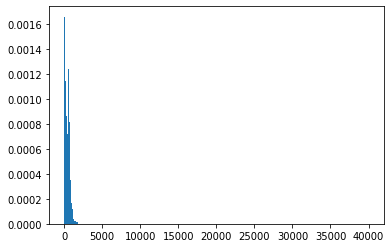

In [11]:
# code goes here. first import required libraries matplotlib and NumPy
import matplotlib.pyplot as plt
import numpy as np

# first, create custom binList with very wide rightmost bin (<40,000)
binList = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 40000]
plt.hist(data['Landsize'], density=True, bins=binList) # all data at left, so useless







## Q7 - Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value

Break this down into slicing the DataFrame first, then creating the visualization.  There are both `plot` and `scatter` functions in the matplotlib library that can help here.  You'll notice there is more than one way to do a thing so much in computer science 😄

If you have to change your axes and end up excluding some points to make the data more visible, then annotate the number of points excluded in the graph. 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Price')

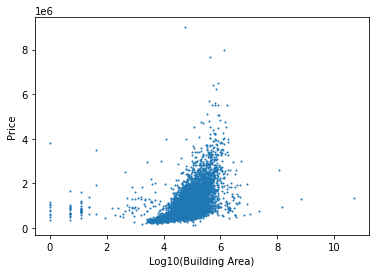

In [12]:
# code goes here
# first, create df that deselects invalid BuildingArea values
validBA = data[data['BuildingArea'].notna()]
x = np.log(data['BuildingArea'], dtype='float64')
plt.scatter(x, data['Price'], s=1) # make s small to see individual points
plt.xlabel('Log10(Building Area)')
plt.ylabel('Price')

## Q8 - List the top 10 SellerG, and what percentage of properties they have listed 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

Check out the function `value_counts` in pandas documentation. 

In [39]:
# code goes here
topTenSellers = data.SellerG.value_counts(normalize=True).mul(100) # mul(100) for %
topTenSellers.head(10) # head has default 5 rows. use parameter of 10


Nelson           11.524300
Jellis            9.690722
hockingstuart     8.593520
Barry             7.444772
Ray               5.162003
Marshall          4.852725
Buxton            4.653903
Biggin            2.893962
Brad              2.518409
Fletchers         2.216495
Name: SellerG, dtype: float64

## Q9 - Fix a problem
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire data set.  Add one room to the Rooms column using two methods:

 - a for loop, and
 - using a single statement
 
Save those DataFrames into the variables `df1` and `df2`.  (We don't use these again, for the next questions just continue using `df`)

Watch out that you don't accidentally change the original DataFrame using a shallow copy.

In [ ]:
# code goes here

## Q10- What is the Address of the earliest built house in the data set?

This will exercise your DataFrame slicing ability. 

In [43]:
# print address of row where yearbuilt attribute is the minimum
print(data[data.YearBuilt == data.YearBuilt.min()].Address) # year = 1196

9968    5 Armstrong St
Name: Address, dtype: object
9968    1196.0
Name: YearBuilt, dtype: float64


## Q11 - Save a file 

The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the council person.  Export the file with only the allowed columns, and do not write and index column.

The other half of `read_csv`, is `to_csv`.  Make sure you follow the documentation and only include the columns asked for in the output.

In [ ]:
# code goes here